<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [17]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind, f_oneway, pearsonr

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 2


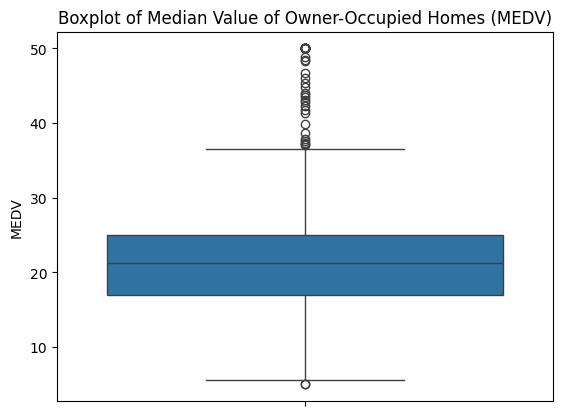

In [11]:
#Boxplot fot MEDV
sns.boxplot(y=boston_df['MEDV'])
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.ylabel("MEDV")
pyplot.show()

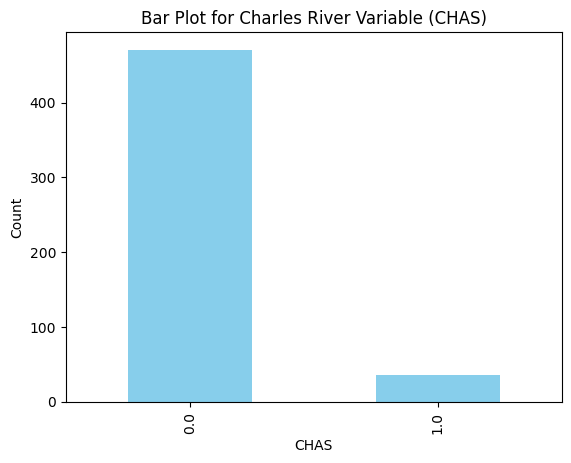

In [13]:
#Bar plot fot CHAS
boston_df['CHAS'].value_counts().plot(kind='bar', color='skyblue')
pyplot.title("Bar Plot for Charles River Variable (CHAS)")
pyplot.ylabel("Count")
pyplot.show()

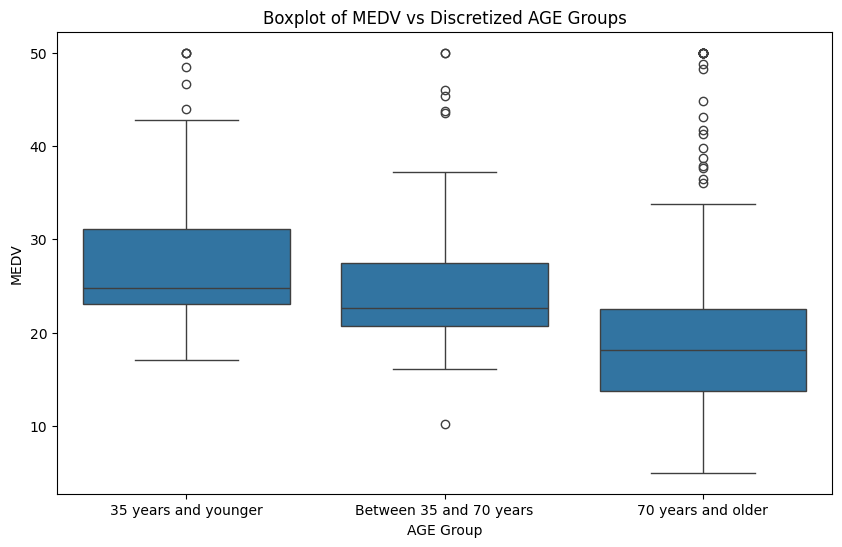

In [14]:
#Boxplot fot MEDV
boston_df['AGE_group'] = pd.cut(
    boston_df['AGE'], 
    bins=[0, 35, 70, 100], 
    labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older']
)


pyplot.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
pyplot.title("Boxplot of MEDV vs Discretized AGE Groups")
pyplot.xlabel("AGE Group")
pyplot.ylabel("MEDV")
pyplot.show()

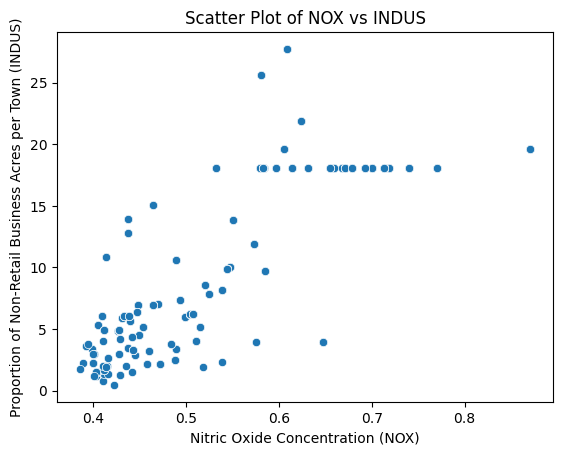

In [15]:
#Scatter plot for NOX vs INDUS
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
pyplot.title("Scatter Plot of NOX vs INDUS")
pyplot.xlabel("Nitric Oxide Concentration (NOX)")
pyplot.ylabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
pyplot.show()

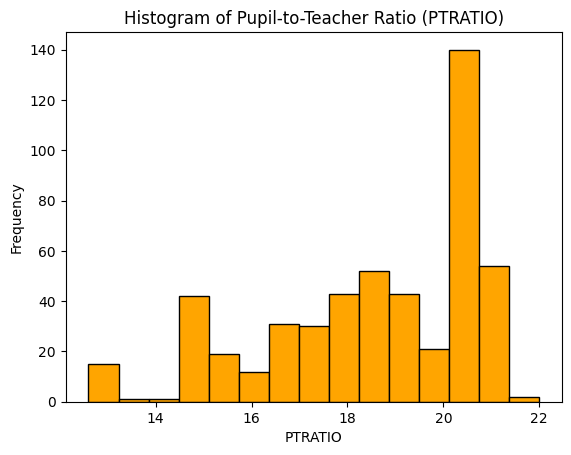

In [16]:
#Histogram for PTRATIO
boston_df['PTRATIO'].plot(kind='hist', bins=15, color='orange', edgecolor='black')
pyplot.title("Histogram of Pupil-to-Teacher Ratio (PTRATIO)")
pyplot.xlabel("PTRATIO")
pyplot.ylabel("Frequency")
pyplot.show()

#### Task 3


#### 1. T-test for indepent samples


In [26]:
# Split data based on CHAS (Charles River: 1 = bounded, 0 = not bounded)
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = ttest_ind(chas_1, chas_0, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in MEDV.")
else:
    print("Fail to reject the null hypothesis: No significant difference in MEDV.")

T-statistic: 3.113291312794837, P-value: 0.003567170098137517
There is a significant difference in MEDV.


#### 2. ANOVA


In [25]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['Young', 'Middle-aged', 'Older'])

# Perform ANOVA
young_group = boston_df[boston_df['AGE_group'] == 'Young']['MEDV']
middle_group = boston_df[boston_df['AGE_group'] == 'Middle-aged']['MEDV']
older_group = boston_df[boston_df['AGE_group'] == 'Older']['MEDV']

f_stat, p_value = f_oneway(young_group, middle_group, older_group)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("There is a difference in MEDV across AGE groups.")
else:
    print("Fail to reject the null hypothesis: No difference in MEDV across AGE groups.")

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
There is a difference in MEDV across AGE groups.


#### 3. Pearson Correlation


In [28]:
corr_coef, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation coefficient: {corr_coef}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("There is a correlation between NOX and INDUS.")
else:
    print("No correlation between NOX and INDUS.")

Correlation coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98
There is a correlation between NOX and INDUS.


#### 4. Regression Analysis


In [31]:
X = boston_df[['DIS']]  # Weighted distance
y = boston_df['MEDV']   # Median value of homes


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
print(model.summary())

# Conclusion
if model.pvalues['DIS'] < 0.05:
    print("DIS has a significant impact on MEDV.")
else:
    print("DIS does not have a significant impact on MEDV.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        18:51:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0